#### Introduction

The digital world has became one of the society’s richest resources. Many forms of data containing critical information such as health, security, and pollution requires constant analysis and regulation, generating important strategies and understanding that can be utilized to solve urgent world problems (Sarker, 2021). The particular extraction of useful ideas from inaccessible compilations of data frames requires advanced analytical skills from data scienctists and engineers. Due to the rapid growth of the data science field, the number of students studying for data science has also been dramatically increasing, leading to a increase curiosity to the career finding process. There is no common list of skill sets for a Data Scientist, and this is evident by the vastly different job titles returned from job postings. Many studies investigated the percentage of different job titiles(King, 2015), but few studies analyzed how the job titles affect salaries. The most common titles are “Data Scientists” and “Data Engineers” out of many other common options (Ho, 2019). We want to find out if there is a significant difference in the salary mean of 2 different job titles - “Data Engineer” and “Data Scientist” through hypothesis testing using t-test and ANOVA. We will be using “Data Science Job Salaries” data frame by Ruchi Bhatia, collected using ai.jobs.net (Bhatia, 2021). The data set included many aspects of data science positions, such as “work year” and “remote” (the complete description will be included below). However, only “job title” and “salary_in_usd” are used to test the hypothesis. 
    

| Title        | Description        | 
| ------------- |:-------------:| 
| work_year      | The year the salary was paid. | 
| experience_level |The experience level in the job |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance      |     
|job_title  |The role worked in during the year.|
|salary |The total gross salary amount paid.|
|salary_currency|The currency of the salary paid as an ISO 4217 currency code.|
|salary_in_usd| The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).|
|employee_residence |Employee's primary country of residence in during the work year as an ISO 3166 country code.|
|remote_ratio|The overall amount of work done remotely, 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)|
|company_location|The country of the employer's main office or contracting branch as an ISO 3166 country code.|
|company_size|S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|

**The null hypothesis** $H_0$: The mu of salary of data engineer = The mu of salary of data scientists 

**The alternative hypothesis** $H_a$: The mu of salary of data engineer $\neq$ the mu of salary of data scientists 


In [1]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
salary <- read.csv("https://raw.githubusercontent.com/iorozco01/STAT201Project/main/ds_salaries.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
head(salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


**Isolation of Salary by Data Scientist and Data Engineer**


In [3]:
# We take all the Data Scientists and Data engineers, filter them out to have access to all individual scientists or engineers.
# We do this to plot them later on to visualize it.
# We then proceed to find the mean salaries of the two jobs. This is so that we can come to a conclusion about who is better paid on average. 

salaries <- salary %>%
    group_by(job_title)%>%
    filter(job_title %in% c("Data Scientist", "Data Engineer")) %>%
    select(c(job_title, salary_in_usd))

salaries_scientists <- salary %>%
    group_by(job_title) %>%
    filter(job_title %in% "Data Scientist") 

salaries_engineer <- salary %>%
    group_by(job_title) %>%
    filter(job_title %in% "Data Engineer") 

salary_mean <- salaries %>%
    summarise(mean_salary_in_usd = mean(salary_in_usd, na.rm=TRUE),
             var_salary_in_usd = var(salary_in_usd, na.rm=TRUE),
             n = n()) 

head(salaries)
head(salaries_scientists)
head(salary_mean)    

job_title,salary_in_usd
<chr>,<int>
Data Scientist,79833
Data Scientist,35735
Data Scientist,51321
Data Scientist,40481
Data Scientist,39916
Data Engineer,41689


X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L


job_title,mean_salary_in_usd,var_salary_in_usd,n
<chr>,<dbl>,<dbl>,<int>
Data Engineer,112725.0,3321111105,132
Data Scientist,108187.8,4110456319,143


We have a total number of 132 sample for Data Engineers and 143 for Data Scientist.

**Creation of bar graphs to visualize data for each individual job**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



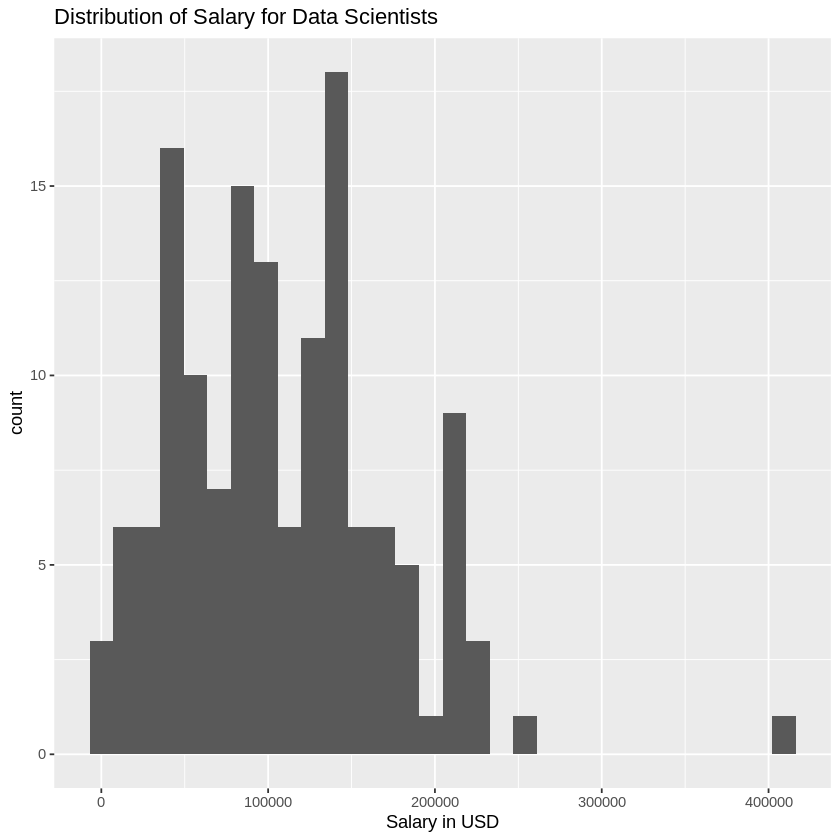

In [4]:
# Here, we go ahead and set the options so that our graph doesn't show the salaries as exponents. 
# We create bar graphs to visualize the distribution of the salary size in USD for Data Scientists.
# We do so to get a better idea of the layout of the data we are analyzing. 

options(scipen = 999)

scientist_hist <- salaries_scientists %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    ggtitle("Distribution of Salary for Data Scientists")

scientist_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



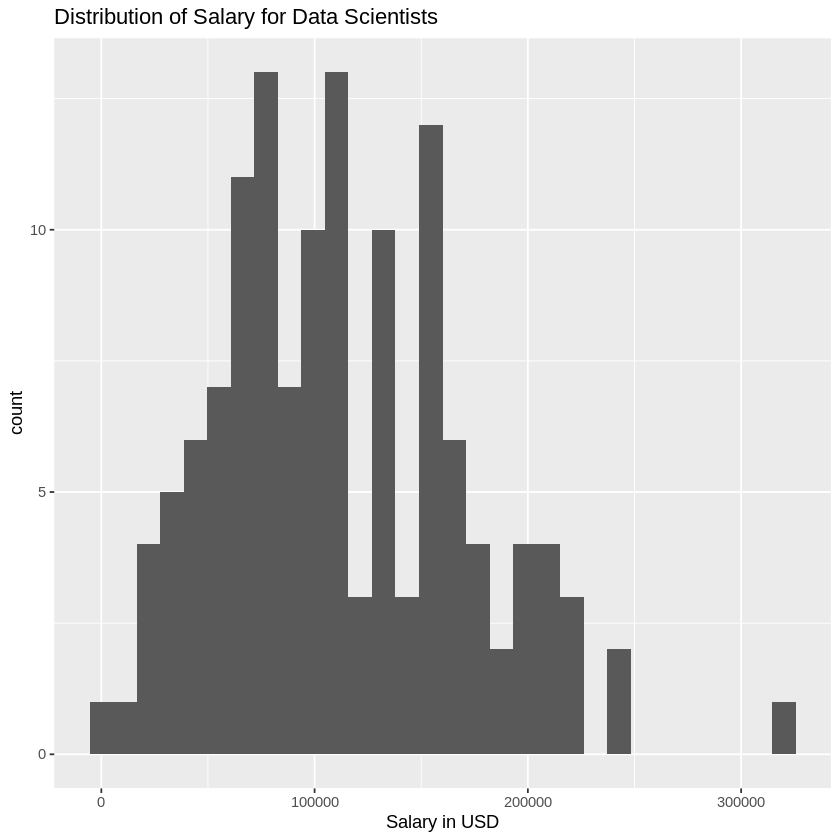

In [5]:
# Here, we go ahead and set the options so that our graph doesn't show the salaries as exponents. 
# We create bar graphs to visualize the distribution of the salary size in USD for Data Engineers.
# We do so to get a better idea of the layout of the data we are analyzing. 

options(scipen = 999)

engineer_hist <- salaries_engineer %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    ggtitle("Distribution of Salary for Data Scientists")

engineer_hist

job_title,mean_salary_in_usd,var_salary_in_usd,n
<chr>,<dbl>,<dbl>,<int>
Data Engineer,112725.0,3321111105,132
Data Scientist,108187.8,4110456319,143


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



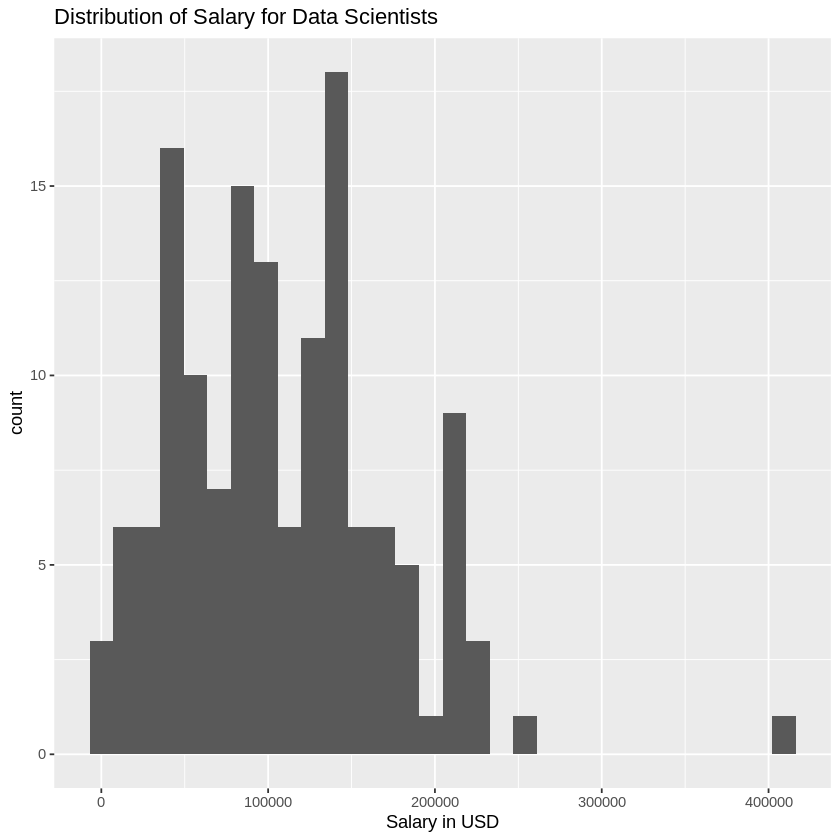

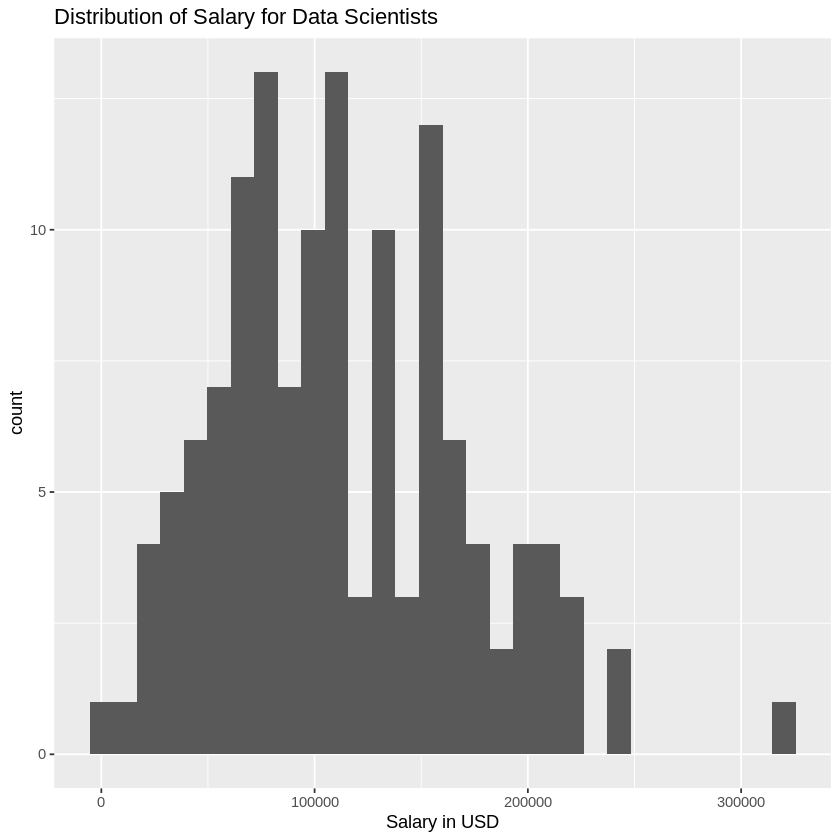

In [6]:
# Here we compiled all previous visualization for easier comparison 
head(salary_mean)
par(mfrow = c(2,1))
scientist_hist
engineer_hist        

The distribution of salaries from both titles seem to be unimodel. Both distribution seems to show a normal distribution, with a few outliers earning high income beyond 300000  and 400000. These outliers, however, will likely not impact the difference in mean since these outliers exist in both distributions.

**Graphing Salaries of Data Engineer and Data Scientists**

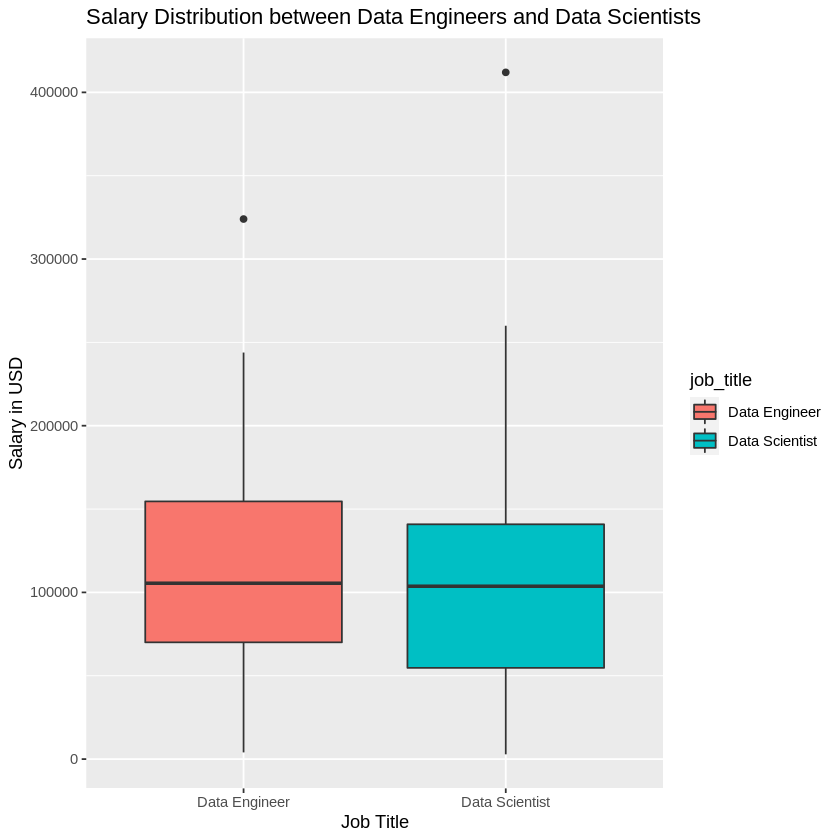

In [7]:
# Here, we go ahead and set the options so that our graph doesn't show the salaries as exponents. 
# We then create side by side boxplots to visualize the division of salaries per job title as well as any outliers that may happen. 

options(scipen = 999)
salary_boxplots <- 
    ggplot(data = salaries, mapping = aes(x = job_title, y = salary_in_usd, fill = job_title)) +                                                       
    geom_boxplot() + 
    xlab("Job Title") +
    ylab("Salary in USD") + 
    ggtitle("Salary Distribution between Data Engineers and Data Scientists")  

salary_boxplots

As explained above, the outliers likely will not impact our result greatly. Thus, for easier visualization of the box plot and normal distribution, they will be removed in the next step. 

**Graphing Salaries of Data Scientists and Data Engineers with Outliers Removed**

job_title,mean_salary_in_usd
<chr>,<dbl>
Data Engineer,111112.2
Data Scientist,106048.3


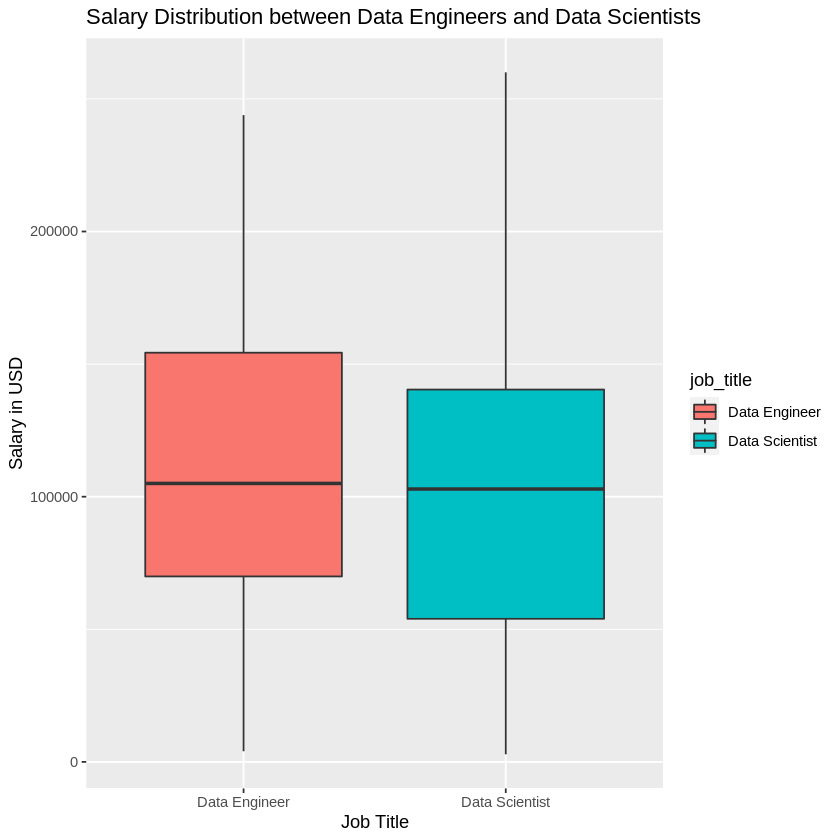

In [8]:
# Here, we go ahead and set the options so that our graph doesn't show the salaries as exponents. 
# We then create side by side boxplots to visualize the division of salaries per job. In this scenario, we eliminate the outliers that Data Engineers
# and Data Scientists have to get a more accurate and comprehensible representation of the values since the inclusion of both these outliers increase 
# the mean of Engineers and Scientists by around $1000 and $2000 respectively, which can be offset by the difference in mean.
# The removal of those outliers will allow for a more uniformed normal distribution, which will be easier to navigate during T-test. 

options(scipen = 999)

salaries_filtered <- salaries %>%
    filter(salary_in_usd < 300000)

salary_mean_filtered <- salaries_filtered %>%
    summarise(mean_salary_in_usd = mean(salary_in_usd, na.rm=TRUE)) 

salary_boxplots_filtered <- 
    ggplot(data = salaries_filtered, mapping = aes(x = job_title, y = salary_in_usd, fill = job_title)) +                                                       
    geom_boxplot() + 
    xlab("Job Title") +
    ylab("Salary in USD") + 
    ggtitle("Salary Distribution between Data Engineers and Data Scientists")  

head(salary_mean_filtered)
salary_boxplots_filtered

**Bootstrap**

In [9]:
set.seed(1)

scientists_bootstrap <- salaries_scientists %>%
    rep_sample_n(size = 132, reps = 1000, replace = TRUE)%>%
    select(c(job_title, salary_in_usd))

engineers_bootstrap <- salaries_engineer %>%
    rep_sample_n(size = 143, reps = 1000, replace = TRUE) %>%
    select(c(job_title, salary_in_usd))


head(scientists_bootstrap)
head(engineers_bootstrap)

Adding missing grouping variables: `replicate`
Adding missing grouping variables: `replicate`


replicate,job_title,salary_in_usd
<int>,<chr>,<int>
1,Data Scientist,42197
1,Data Scientist,135000
1,Data Scientist,120000
1,Data Scientist,210000
1,Data Scientist,109000
1,Data Scientist,136620


replicate,job_title,salary_in_usd
<int>,<chr>,<int>
1,Data Engineer,200000
1,Data Engineer,68147
1,Data Engineer,100800
1,Data Engineer,150000
1,Data Engineer,65000
1,Data Engineer,165000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



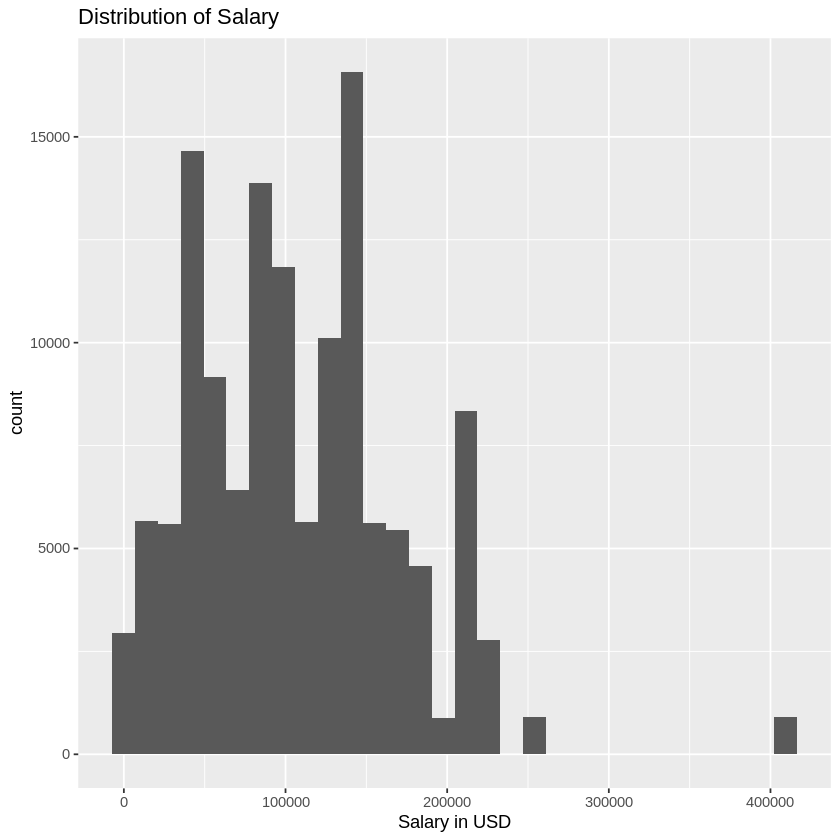

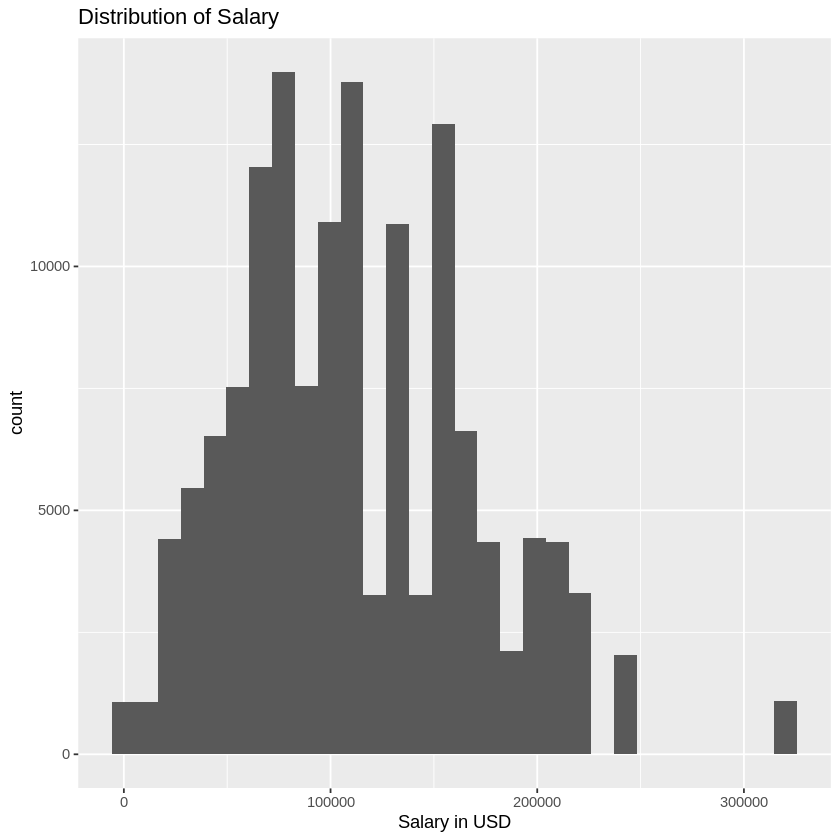

In [10]:
scientists_boot_hist <- scientists_bootstrap %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    ggtitle("Distribution of Salary")

engineers_boot_hist <- engineers_bootstrap %>%
    ggplot() +
    geom_histogram(aes(salary_in_usd)) +
    xlab("Salary in USD") +
    ggtitle("Distribution of Salary")



scientists_boot_hist
engineers_boot_hist

**Confidence Interval Bootstrapping**

In [21]:
set.seed(1)

bootstrap_scientists_ci <- scientists_bootstrap %>%
    get_confidence_interval(level = 0.90, type = "percentile")

bootstrap_engineers_ci <- engineers_bootstrap %>%
    get_confidence_interval(level = 0.90, type = "percentile")


head(bootstrap_scientists_ci)
head(bootstrap_engineers_ci)

lower_ci,upper_ci
<dbl>,<dbl>
16904,211500


lower_ci,upper_ci
<dbl>,<dbl>
28016,210000


**Confidence Interval Asymptotics**

In [23]:
set.seed(1)

engineers_mean <- mean(salaries_engineer$salary_in_usd, na.rm = TRUE)
engineers_std_error <- sd(salaries_engineer$salary_in_usd, na.rm = TRUE)/sqrt(length(salaries_engineer))

engineers_ci <- salaries_engineer %>%
    tibble(
    lower_ci = qnorm(0.025, engineers_mean, engineers_std_error),
    upper_ci = qnorm(0.975, engineers_mean, engineers_std_error)) %>%
    select(lower_ci, upper_ci)

head(engineers_ci, 1)

lower_ci,upper_ci
<dbl>,<dbl>
80118.88,145331.1


In [24]:
set.seed(1)

scientists_mean <- mean(salaries_scientists$salary_in_usd, na.rm = TRUE)
scientists_std_error <- sd(salaries_scientists$salary_in_usd, na.rm = TRUE)/sqrt(length(salaries_scientists))

scientists_ci <- salaries_scientists %>%
    tibble(
    lower_ci = qnorm(0.025, scientists_mean, scientists_std_error),
    upper_ci = qnorm(0.975, scientists_mean, scientists_std_error)) %>%
    select(lower_ci, upper_ci)

head(scientists_ci, 1)

lower_ci,upper_ci
<dbl>,<dbl>
71913.24,144462.4


The conditions for a T-test is met since the measured values are on a ratio scale. The sample size as explored in count_salaries is also sufficiently large for comparison (132 and 143) and approximately the same with similar variances. Furthermore, they are independently collected through random sampling, and both distributions follow an approximately normal distributions. The criterium for a T-test has been met. Thus we are able to conduct t-test for this particular sample.

Below we will be calculating the test statistic of the sample. We will be calculating difference in mean.

**Test statistic**

In [14]:
salary_mean

job_title,mean_salary_in_usd,var_salary_in_usd,n
<chr>,<dbl>,<dbl>,<int>
Data Engineer,112725.0,3321111105,132
Data Scientist,108187.8,4110456319,143


In [15]:
T <- 
  (salary_mean$mean_salary_in_usd[1] - salary_mean$mean_salary_in_usd[2]) / sqrt(salary_mean$var_salary_in_usd[2]/salary_mean$n[2] + salary_mean$var_salary_in_usd[1]/salary_mean$n[1])
T

[1] 0.6179777

**T- test**

samme thing - why are we using 2 sample t-test and why our samples satisfy the requirement 

In [25]:
set.seed(1)

t.test(scientists_bootstrap$salary_in_usd, salaries_engineer$salary_in_usd, alternative = "less", var.equal = TRUE)

t.test(salaries_scientists$salary_in_usd, engineers_bootstrap$salary_in_usd, alternative = "less", var.equal = TRUE)


	Two Sample t-test

data:  scientists_bootstrap$salary_in_usd and salaries_engineer$salary_in_usd
t = -0.86506, df = 132130, p-value = 0.1935
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
    -Inf 4339.94
sample estimates:
mean of x mean of y 
 107910.6  112725.0 



	Two Sample t-test

data:  salaries_scientists$salary_in_usd and engineers_bootstrap$salary_in_usd
t = -0.93479, df = 143141, p-value = 0.1749
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 3413.104
sample estimates:
mean of x mean of y 
 108187.8  112681.1 


In [19]:
set.seed(1)
diff_salaries <- salaries %>%  
    specify(salary_in_usd~job_title) %>%
    hypothesize (null = "independence") %>%
    generate(type = "permute") %>%
    calculate(stat = "diff in means", order = c("Data Engineer", "Data Scientist"))

diff_salaries

stat
<dbl>
-7640.964


**Methods: Plan**

The good thing about this report is we choose to visualize the data in histogram and boxplot. The histogram gives us a good start with showing the salary distribution for both data scientists and data engineers. Here we noticed that there are outliers for both of the job titles. The side boxplots helps us show distributions of numeric data values, and being very useful in comparing the salaries. The decision of removing the outliers also allows us to have a better visualization. In this case, we can guarantee that we have made a nice and clear boxplot.

Although we have a clear boxplot, the flaw is that the sample size of two job titles are not the same(132 for data engineer and 143 for data scientist),  which could impact our next step of using a T test. Also, though data engineer and data scientist do have a salary gap, the difference is smaller than what we expected.  To make sure we can address this gap and bring out a nice conclusion, a T test and an anova are necessary for better comparison of mean value of salaries. 

To maintain accuracy and be rigorous, we would use hypothesis test in the report, also add confidence interval. Bootstrapping and asymptotics will be employed as well. 

Here is how our final report might play out:

**What do you expect to find?**

We expect to find that Data Engineers earn a higher salary than Data Scientists. This is due to the fact that here, at UBC, Engineering students usually have a heavier course load than most Data Science students. They also have heavier workload than data scientists at work. Data engineers need to develops, maintains data pipelines and architectures while data scientists analyze data, solve problems based on the architectures data engineers created(Willems,2017).  Data engineers do the legwork to supports the requirements of the data scientists. Data scientists usually would not be required to slove very high level tasks with requisite depth of knowledge (University Virginia, 2021). In this case, we conisder that data engineers have heavier work and responsibilities than data scientist. Therefore, they deserve higher salary.

**What impact could such findings have?**

These findings could sway in the future someone’s decisions about which major they would like to belong to in university, data science or data engineering, based on salary gap.

**What future questions could this lead to?**

This could lead to a conversation about based on the workload, whether the current income gap is fair enough between data scientist and data engineer.




**References**

Sarker, I.H. Data Science and Analytics: An Overview from Data-Driven Smart Computing, Decision-Making and Applications Perspective. SN COMPUT. SCI. 2, 377 (2021). https://doi.org/10.1007/s42979-021-00765-8

King, John, and Roger Magoulas. 2015 data science salary survey. O'Reilly Media, Incorporated, (2015). http://www.eli.sdsu.edu/courses/fall16/cs696/2015-data-science-salary-survey.pdf

Ho, Andy, et al. "A data science approach to defining a data scientist." SMU Data Science Review 2.3 (2019): 4. https://scholar.smu.edu/datasciencereview/vol2/iss3/4/
 Bhatia, Ruchi. “Data Science Job Salaries”, Kaggle (2021)
 
University Virginia. “Data Science VS Data Engineering.” School of Data Science, 23 Sept. 2021, https://datascience.virginia.edu/news/data-science-vs-data-engineering. 

Willems, Karlijn. “Data Scientist vs Data Engineer.” DataCamp, DataCamp, 23 Feb. 2017, https://www.datacamp.com/blog/data-scientist-vs-data-engineer. 
